[1.6236036927180362, 0.11969341402710076, 0.005568107364756102, 0.0002490317381935272, 1.1648188531691455e-05, 5.875925559898505e-07]


/Users/vladimirmakaric/anaconda3/envs/ai/lib/python3.11/site-packages/pyamg/classical/classical.py:97: SparseEfficiencyWarning: Implicit conversion of A to CSR
  warn('Implicit conversion of A to CSR',


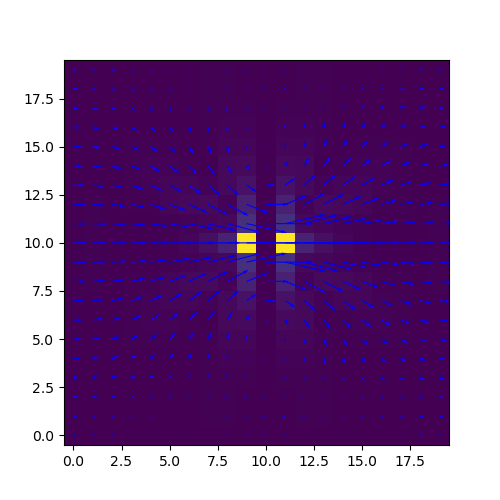

In [4]:
# Divergence is not equal zero after the projection step.
%matplotlib widget
import matplotlib.pyplot as plt
import importlib
import navier_stokes
importlib.reload(navier_stokes)
import numpy as np

height = 20
width = 20
# s,e =int(height / 3), int(height * (2 / 3))
cells = navier_stokes.cells(np.zeros(shape=(height,width)))
vf = np.zeros(cells.shape + (2,))

# Circular force field, still has divergence problem.
center = np.array([10,10])
for j,i in np.ndindex(cells.shape):
    invec = np.array([i,j])
    dist = np.linalg.norm(center - invec)
    vf[j][i] = [2*np.exp(-dist/2), 0]

# vf[s : e, s:e] = [0.8, 0]
# Problem persists even if the force field gradually tapers off.
# vf[s-4 : e+4, s-4:e+4] = [0.2, 0]
# vf[s-3 : e+3, s-3:e+3] = [0.4, 0]
# vf[s-2 : e+2, s-2:e+2] = [0.6, 0]
# vf[s-1 : e+1, s-1:e+1] = [0.8, 0]
# vf[s:e,s:e] = [1, 0]

hd = navier_stokes.HelmholtzDecomposition(cells)

residuals = []
vf, _ = hd.solenoidalPart(vf, residuals)
print(residuals)
divfield = np.zeros(cells.shape)
for fc in cells.flat:
    xdiff = (vf[fc.right.index][0] - vf[fc.left.index][0]) / 2
    ydiff = (vf[fc.up.index][1] - vf[fc.down.index][1]) / 2
    divergence = xdiff + ydiff
    divfield[fc.index] = np.abs(divergence)

X, Y = np.meshgrid(np.arange(width), np.arange(height))
fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(X, Y, vf[:, :, 0], vf[:, :, 1], color="b")
plt.imshow(divfield, interpolation='none', origin='lower')
plt.show()